<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/Clusteriza%C3%A7%C3%A3o_por_dados_cont%C3%ADnuos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn import preprocessing

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/data_completo_v1.csv')
data.head()

,Município,codigo_ibge,Área Territorial,População Estimada,Densidade Demográfica,Escolarização 6 a 14 anos,IDHM,Mortalidade Infantil,PIB per capita,Despesas empenhadas/hab.,Receitas realizadas/hab.,Casos COVID/hab.,Óbitos COVID/hab.,Enfermeiros/hab.,Medicos/hab.,idade_media
0,ADAMANTINA,3500105,412.0,35111,82.15,97.6,790,11.63,30962.66,3904.294094,4577.445224,0.299450,0.005127,2.45,5.09,41.0
1,ADOLFO,3500204,211.0,3554,16.85,98.6,730,19.23,25867.75,5656.690245,7690.981235,0.271525,0.007034,2.26,9.59,40.9
2,AGUAÍ,3500303,475.0,36648,67.72,95.8,715,16.06,28041.03,1969.240725,2294.661648,0.186586,0.003711,0.57,1.76,35.9
3,ÁGUAS DA PRATA,3500402,143.0,8221,53.05,98.8,781,25.32,20683.88,2963.556926,3575.021061,0.231237,0.004622,0.61,2.18,40.9
4,ÁGUAS DE LINDÓIA,3500501,60.0,18808,287.16,96.2,745,8.37,26427.34,3998.377176,4622.991394,0.275362,0.003350,0.09,2.33,37.9


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Município                  645 non-null    object 
 1   codigo_ibge                645 non-null    int64  
 2   Área Territorial           645 non-null    float64
 3   População Estimada         645 non-null    int64  
 4   Densidade Demográfica      645 non-null    float64
 5   Escolarização 6 a 14 anos  645 non-null    float64
 6   IDHM                       645 non-null    int64  
 7   Mortalidade Infantil       639 non-null    float64
 8   PIB per capita             645 non-null    float64
 9   Despesas empenhadas/hab.   645 non-null    float64
 10  Receitas realizadas/hab.   645 non-null    float64
 11  Casos COVID/hab.           645 non-null    float64
 12  Óbitos COVID/hab.          645 non-null    float64
 13  Enfermeiros/hab.           645 non-null    float64

In [15]:
data.set_index('Município', inplace=True)

In [16]:
data.drop(['codigo_ibge'], axis=1, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, ADAMANTINA to ESTIVA GERBI
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Área Territorial           645 non-null    float64
 1   População Estimada         645 non-null    int64  
 2   Densidade Demográfica      645 non-null    float64
 3   Escolarização 6 a 14 anos  645 non-null    float64
 4   IDHM                       645 non-null    int64  
 5   Mortalidade Infantil       639 non-null    float64
 6   PIB per capita             645 non-null    float64
 7   Despesas empenhadas/hab.   645 non-null    float64
 8   Receitas realizadas/hab.   645 non-null    float64
 9   Casos COVID/hab.           645 non-null    float64
 10  Óbitos COVID/hab.          645 non-null    float64
 11  Enfermeiros/hab.           645 non-null    float64
 12  Medicos/hab.               645 non-null    float64
 13  idade_media                645 non-nu

In [21]:
data.dropna(how='any', inplace=True)

In [36]:
# normalizando o dataset
data_norm = (data - data.min())/(data.max() - data.min())
data_norm.describe()

,Área Territorial,População Estimada,Densidade Demográfica,Escolarização 6 a 14 anos,IDHM,Mortalidade Infantil,PIB per capita,Despesas empenhadas/hab.,Receitas realizadas/hab.,Casos COVID/hab.,Óbitos COVID/hab.,Enfermeiros/hab.,Medicos/hab.,idade_media
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,0.194293,0.005783,0.021612,0.859421,0.450704,0.106234,0.073427,0.270492,0.207897,0.343119,0.297552,0.214628,0.129058,0.398960
std,0.162083,0.040635,0.089968,0.090587,0.145955,0.109020,0.072654,0.142145,0.115987,0.195819,0.136448,0.144535,0.128976,0.160277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080008,0.000387,0.001327,0.816327,0.358744,0.047503,0.041494,0.205553,0.153691,0.183214,0.207813,0.127451,0.045881,0.278571
50%,0.142800,0.001064,0.002613,0.870748,0.443946,0.078682,0.058816,0.250420,0.190540,0.322375,0.284818,0.188725,0.092805,0.392857
75%,0.258255,0.003413,0.007252,0.911565,0.547085,0.125375,0.083213,0.322864,0.244223,0.475111,0.375259,0.279412,0.174661,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


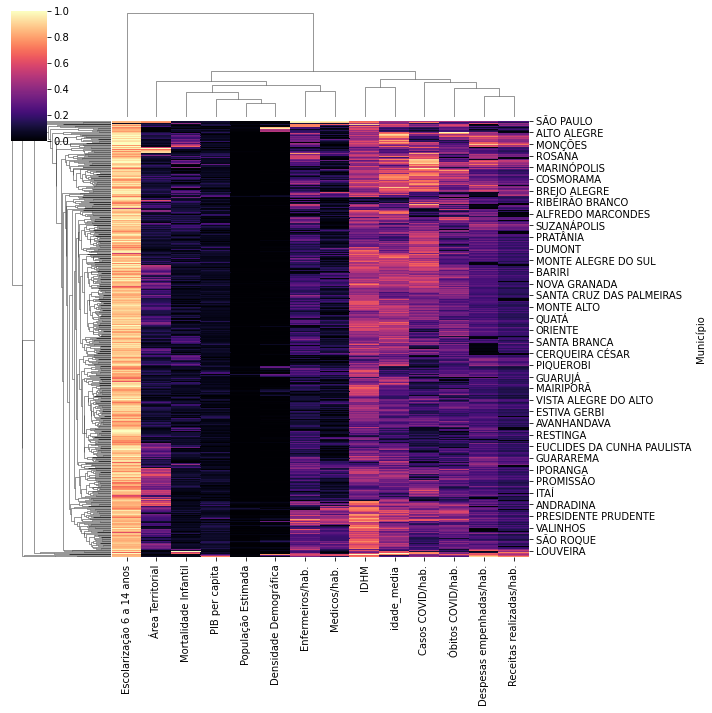

In [43]:
sns.clustermap(data=data_norm, cmap='magma', col_cluster=True)